In [30]:
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt


In [31]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('./KAIST/CVS_M3.csv')):
    _dfs_list.append(pd.read_csv(csv_filename,header=None))
df = pd.concat(_dfs_list)
del(_dfs_list)
#df = df.drop(['Unnamed: 0'], axis=1)
df.columns = ['sample_'+str(col) for col in df.columns]
sensor= ['Fp1-Fp3']*28+['Fp1']*23
df['sensor_postion']=sensor
subjects=[]
for i in range(0,51):
    a="subject_"+str(i)
    subjects.append(a)
#print(sensor,len(sensor))
df['subject_id']=subjects
df

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:21<00:00, 21.72s/it]


,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
0,-5.810000,-7.410000,-7.390000,-4.190000,-0.930000,-0.070000,-1.700000,-3.850000,-3.790000,-2.120000,...,5.340000,5.120000,4.540000,1.960000,0.270000,2.990000,5.480000,4.920000,Fp1-Fp3,subject_0
1,-15.760000,-21.680000,-27.820000,-31.320000,-31.580000,-28.870000,-26.960000,-26.310000,-23.620000,-21.120000,...,-4.100000,6.210000,16.580000,17.910000,9.460000,-0.120000,-6.670000,-9.840000,Fp1-Fp3,subject_1
2,8.830000,11.530000,13.110000,12.350000,13.860000,17.810000,18.540000,15.910000,15.150000,16.230000,...,9.780000,7.140000,5.280000,5.780000,6.650000,7.430000,9.200000,10.850000,Fp1-Fp3,subject_2
3,19.110000,19.130000,21.720000,22.150000,20.050000,19.120000,19.140000,19.090000,18.930000,17.180000,...,6.900000,7.960000,7.990000,7.160000,6.910000,6.310000,4.750000,5.370000,Fp1-Fp3,subject_3
4,9.040000,9.280000,7.060000,0.510000,-3.670000,-2.320000,-0.930000,-4.450000,-11.230000,-16.480000,...,-21.570000,-20.410000,-22.900000,-24.900000,-23.660000,-22.480000,-25.630000,-27.960000,Fp1-Fp3,subject_4
5,-11.680000,-8.610000,-4.880000,-2.490000,-2.070000,-0.540000,5.180000,11.430000,12.360000,10.940000,...,-3.690000,-3.260000,-0.760000,-1.060000,-3.260000,-3.380000,-0.940000,0.550000,Fp1-Fp3,subject_5
6,34.620000,39.140000,40.970000,40.930000,41.300000,41.320000,39.050000,36.260000,34.700000,34.540000,...,-49.240000,-45.970000,-46.860000,-51.900000,-56.470000,-55.670000,-48.880000,-42.990000,Fp1-Fp3,subject_6
7,-23.270000,-17.140000,-4.980000,6.490000,11.350000,7.770000,0.880000,0.130000,8.210000,16.350000,...,-0.780000,-8.860000,-6.640000,-1.970000,2.990000,8.300000,9.830000,2.450000,Fp1-Fp3,subject_7
8,12.730000,8.910000,7.380000,8.040000,7.730000,5.560000,4.700000,8.010000,10.910000,10.650000,...,11.540000,9.820000,8.940000,9.560000,10.350000,11.700000,14.680000,17.690000,Fp1-Fp3,subject_8
9,-12.620000,-12.230000,-7.550000,-7.660000,-7.760000,-5.400000,-11.670000,-16.860000,-10.240000,-4.500000,...,5.810000,6.280000,4.320000,-3.500000,-8.040000,-2.320000,4.720000,8.190000,Fp1-Fp3,subject_9


In [32]:
df1=df.head(28)
df1

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
0,-5.81,-7.41,-7.39,-4.19,-0.93,-0.07,-1.70,-3.85,-3.79,-2.12,...,5.34,5.12,4.54,1.96,0.27,2.99,5.48,4.92,Fp1-Fp3,subject_0
1,-15.76,-21.68,-27.82,-31.32,-31.58,-28.87,-26.96,-26.31,-23.62,-21.12,...,-4.10,6.21,16.58,17.91,9.46,-0.12,-6.67,-9.84,Fp1-Fp3,subject_1
2,8.83,11.53,13.11,12.35,13.86,17.81,18.54,15.91,15.15,16.23,...,9.78,7.14,5.28,5.78,6.65,7.43,9.20,10.85,Fp1-Fp3,subject_2
3,19.11,19.13,21.72,22.15,20.05,19.12,19.14,19.09,18.93,17.18,...,6.90,7.96,7.99,7.16,6.91,6.31,4.75,5.37,Fp1-Fp3,subject_3
4,9.04,9.28,7.06,0.51,-3.67,-2.32,-0.93,-4.45,-11.23,-16.48,...,-21.57,-20.41,-22.90,-24.90,-23.66,-22.48,-25.63,-27.96,Fp1-Fp3,subject_4
5,-11.68,-8.61,-4.88,-2.49,-2.07,-0.54,5.18,11.43,12.36,10.94,...,-3.69,-3.26,-0.76,-1.06,-3.26,-3.38,-0.94,0.55,Fp1-Fp3,subject_5
6,34.62,39.14,40.97,40.93,41.30,41.32,39.05,36.26,34.70,34.54,...,-49.24,-45.97,-46.86,-51.90,-56.47,-55.67,-48.88,-42.99,Fp1-Fp3,subject_6
7,-23.27,-17.14,-4.98,6.49,11.35,7.77,0.88,0.13,8.21,16.35,...,-0.78,-8.86,-6.64,-1.97,2.99,8.30,9.83,2.45,Fp1-Fp3,subject_7
8,12.73,8.91,7.38,8.04,7.73,5.56,4.70,8.01,10.91,10.65,...,11.54,9.82,8.94,9.56,10.35,11.70,14.68,17.69,Fp1-Fp3,subject_8
9,-12.62,-12.23,-7.55,-7.66,-7.76,-5.40,-11.67,-16.86,-10.24,-4.50,...,5.81,6.28,4.32,-3.50,-8.04,-2.32,4.72,8.19,Fp1-Fp3,subject_9


In [33]:
df2=df.tail(23)
df2

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
28,4.050000,1.580000,-0.100000,-1.090000,-1.390000,-0.780000,0.520000,2.220000,4.620000,7.300000,...,73.120000,69.110000,64.820000,60.870000,57.560000,53.830000,48.540000,41.790000,Fp1,subject_28
29,-18.190000,-15.070000,-12.170000,-11.200000,-11.920000,-12.370000,-14.420000,-18.210000,-19.710000,-17.780000,...,-7.990000,-14.240000,-17.200000,-16.700000,-13.230000,-6.940000,-2.060000,-1.520000,Fp1,subject_29
30,-48.530000,-47.760000,-46.600000,-45.740000,-46.210000,-47.790000,-49.350000,-49.940000,-49.220000,-47.510000,...,16.910000,16.240000,14.760000,12.530000,10.830000,10.510000,10.590000,10.040000,Fp1,subject_30
31,120.610000,121.870000,122.980000,123.220000,122.060000,119.480000,116.740000,115.080000,113.950000,112.490000,...,25.940000,24.860000,23.140000,22.180000,22.880000,23.000000,21.350000,20.270000,Fp1,subject_31
32,-13.770000,-14.990000,-16.090000,-17.050000,-17.290000,-16.180000,-14.340000,-12.850000,-11.830000,-11.210000,...,5.130000,4.640000,3.380000,2.390000,2.200000,2.880000,4.830000,7.920000,Fp1,subject_32
33,32.840000,33.710000,34.430000,34.620000,34.870000,36.690000,38.940000,40.180000,39.290000,36.110000,...,-11.210000,-13.950000,-17.000000,-19.420000,-20.760000,-20.960000,-20.500000,-20.590000,Fp1,subject_33
34,-6.470000,-6.570000,-5.740000,-5.450000,-7.190000,-9.920000,-11.170000,-8.690000,-4.240000,-2.030000,...,-28.540000,-28.510000,-27.630000,-25.720000,-23.380000,-20.800000,-18.160000,-15.860000,Fp1,subject_34
35,-31.560000,-33.180000,-34.170000,-34.550000,-34.720000,-34.060000,-32.300000,-29.860000,-26.340000,-21.820000,...,15.340000,15.070000,15.480000,15.750000,14.690000,12.500000,9.010000,4.460000,Fp1,subject_35
36,3.966537,3.607140,3.058107,2.357074,1.384656,0.186555,0.010618,1.086945,3.127285,5.404440,...,2.549503,3.865762,4.028021,3.460382,2.519652,1.251482,0.571604,0.416387,Fp1,subject_36
37,3.190000,3.890000,5.150000,6.720000,8.200000,8.980000,9.340000,9.190000,7.750000,5.240000,...,3.760000,4.350000,5.090000,6.010000,6.380000,7.550000,9.140000,7.710000,Fp1,subject_37


In [34]:
ch_names = ['Fp1-Fp3']*28
# extract the data values and the channel names
data = df1.iloc[:, :-2].values # transpose the data so that channels are in rows
ch_types = ['eeg']*28
# create the info object for the raw data
sfreq = 256  # the sampling frequency of the data in Hz
info = mne.create_info(ch_names, sfreq,ch_types)

# create the raw object
raw = mne.io.RawArray(data, info)


Creating RawArray with float64 data, n_channels=28, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


C:\Users\Dedu\AppData\Local\Temp\ipykernel_1380\1968422089.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'Fp1-Fp3'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names, sfreq,ch_types)


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

In [36]:

#from mne import highpass_filter

# read in your data and create a RawArray object

# high-pass filter the data
#raw = highpass_filter(raw, 1.0)

# pick the EEG channels for ICA
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
n_components = 20
ica = ICA(n_components=n_components, random_state=0)
ica.fit(raw, picks=picks)


Fitting ICA to data using 28 channels (please be patient, this may take a while)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_1380\3536447973.py:14: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks)


Selecting by number: 20 components
Fitting ICA took 3.0s.


Method,fastica
Fit,18 iterations on raw data (75000 samples)
ICA components,20
Available PCA components,28
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=20, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


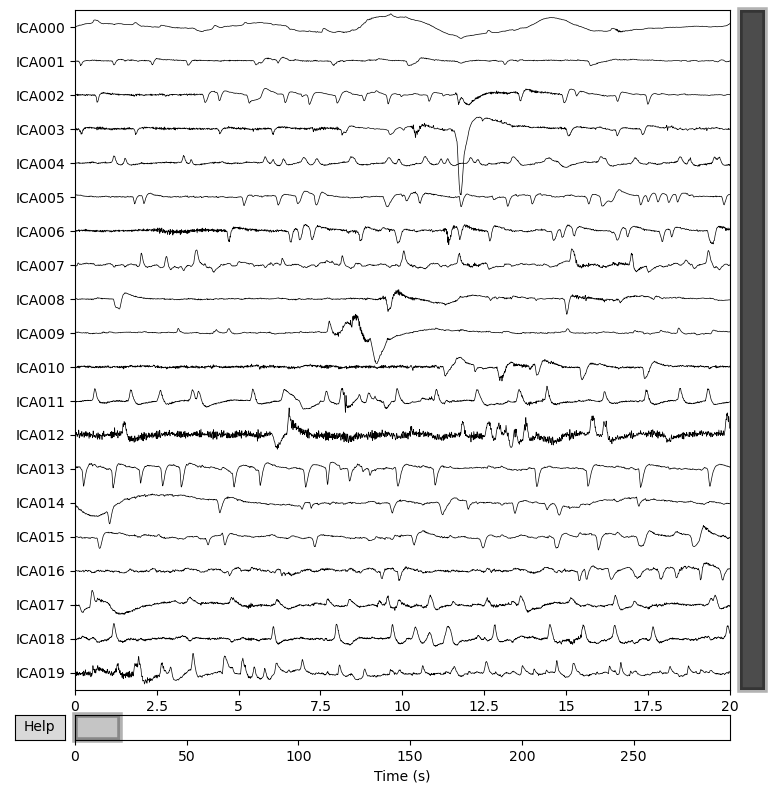

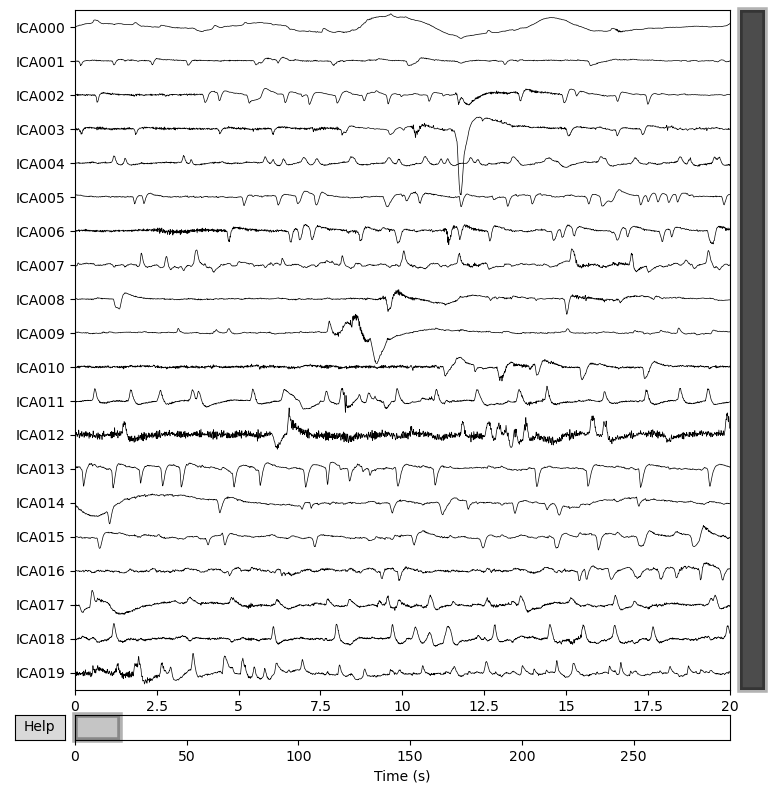

In [37]:
 ica.plot_sources(raw, block=False)

Component 0 has 1 large amplitude peaks, possibly eye blinks
Component 1 has 1 large amplitude peaks, possibly eye blinks
Component 2 has 1 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 5, using nperseg = 5
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 23, using nperseg = 23
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 26, using nperseg = 26
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is great

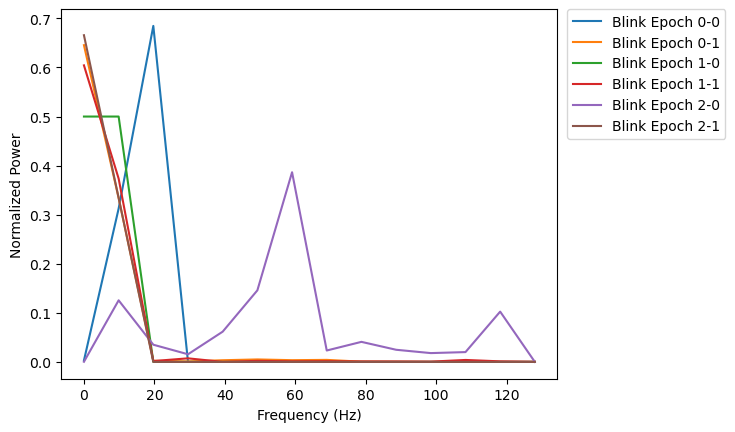

Total number of eye blinks detected:  3


In [38]:
import numpy as np
from scipy.signal import welch

def heaviside(x, threshold=0):
    return np.where(x >= threshold, 1, 0)

blink_indices = []
power_spectra = []
blink_epochs_psd = []

max_freq_bins = 0

for i in range(ica.n_components_):
    component = ica.get_components()[:, i]
    amplitude = max(abs(component))
    threshold = 1.5  # adjust this threshold as needed
    
    blink_signal = heaviside(abs(component) - threshold)
    num_blinks = sum(np.diff(blink_signal) > 0)
    
    if num_blinks > 0:
        blink_indices.append(i)
        print('Component {} has {} large amplitude peaks, possibly eye blinks'.format(i, num_blinks))
        
        # Compute the power spectrum for each blink epoch
        blink_epochs = np.split(component, np.where(np.diff(blink_signal) > 0)[0] + 1)
        for blink_epoch in blink_epochs:
            freq, psd = welch(blink_epoch, fs=ica.info['sfreq'], nperseg=ica.info['sfreq'] * 2)
            psd_normalized = psd / np.sum(psd)
            blink_epochs_psd.append(psd_normalized)
            max_freq_bins = max(max_freq_bins, len(freq))
        
        power_spectra.append(blink_epochs_psd)
        blink_epochs_psd = []

# Pad the power spectra with zeros to have the same number of frequency bins
for i in range(len(power_spectra)):
    for j in range(len(power_spectra[i])):
        power_spectra[i][j] = np.pad(power_spectra[i][j], (0, max_freq_bins - len(power_spectra[i][j])), mode='constant')

# Plot the normalized power spectra for each blink epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for i, psds in enumerate(power_spectra):
    for j, psd_normalized in enumerate(psds):
        freq = np.linspace(0, ica.info['sfreq']/2, len(psd_normalized))
        ax.plot(freq, psd_normalized, label='Blink Epoch {}-{}'.format(i,j))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Normalized Power')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

print("Total number of eye blinks detected: ", len(blink_indices))


Effective window size : 0.109 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


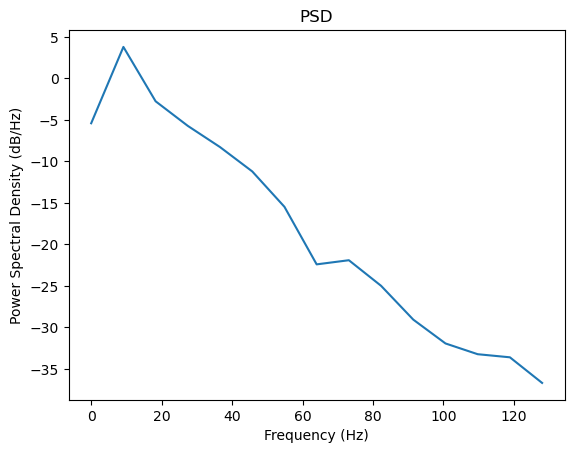

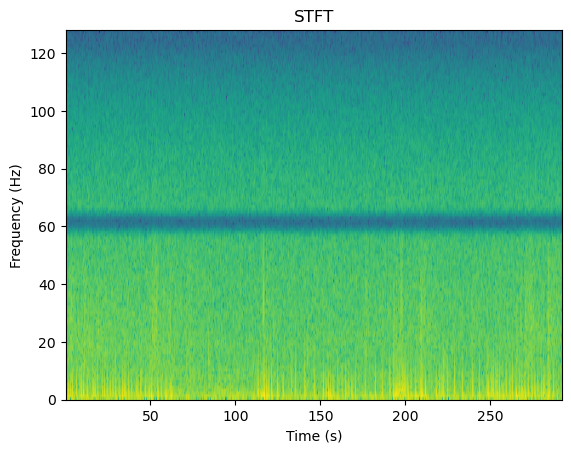

In [39]:
raw_band = raw.copy()

# Calculate power spectral density
n_fft = 28
psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'],n_fft=n_fft)

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Plot STFT
plt.figure()
plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')

plt.show()

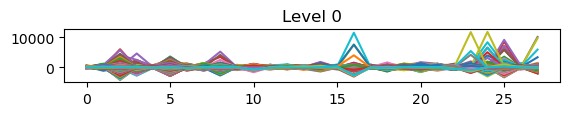

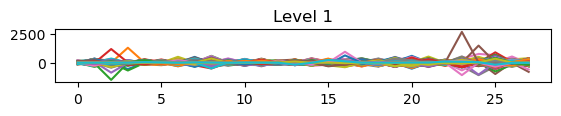

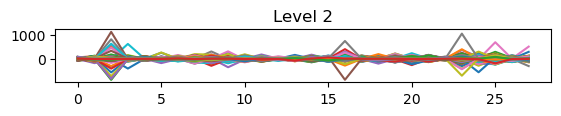

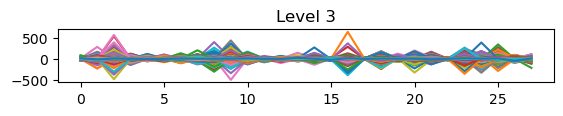

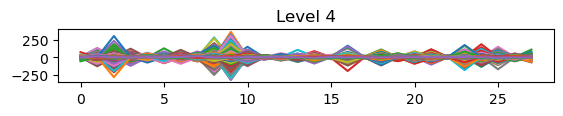

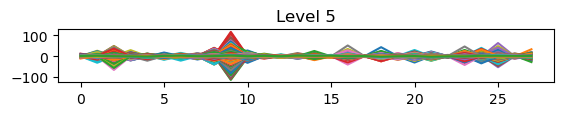

mean_spectrum: [1.21109813e+05 4.85158417e+03 5.40902950e+02 1.81250503e+02
 5.51434322e+01 2.99305410e+00]
var_spectrum: [2.30655784e+10 1.31883214e+07 1.55027085e+05 2.37419540e+04
 6.38352005e+03 3.87576228e+01]


In [40]:
import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data=raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

for remaing data apart from first 28 subjects.

In [41]:
data = df2.iloc[:, :-2].values
ch_names = ['Fp1']*23
# extract the data values and the channel names
ch_types = ['eeg']*23
# create the info object for the raw data
sfreq = 256  # the sampling frequency of the data in Hz
info = mne.create_info(ch_names, sfreq,ch_types)
# create the raw object
raw = mne.io.RawArray(data, info)


Creating RawArray with float64 data, n_channels=23, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


C:\Users\Dedu\AppData\Local\Temp\ipykernel_1380\2646477564.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'Fp1'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names, sfreq,ch_types)


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
n_components = 20
ica = ICA(n_components=n_components, random_state=0)
ica.fit(raw, picks=picks)


Fitting ICA to data using 23 channels (please be patient, this may take a while)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_1380\3602276034.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks)


Selecting by number: 20 components
Fitting ICA took 2.3s.


Method,fastica
Fit,11 iterations on raw data (75000 samples)
ICA components,20
Available PCA components,23
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=20, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


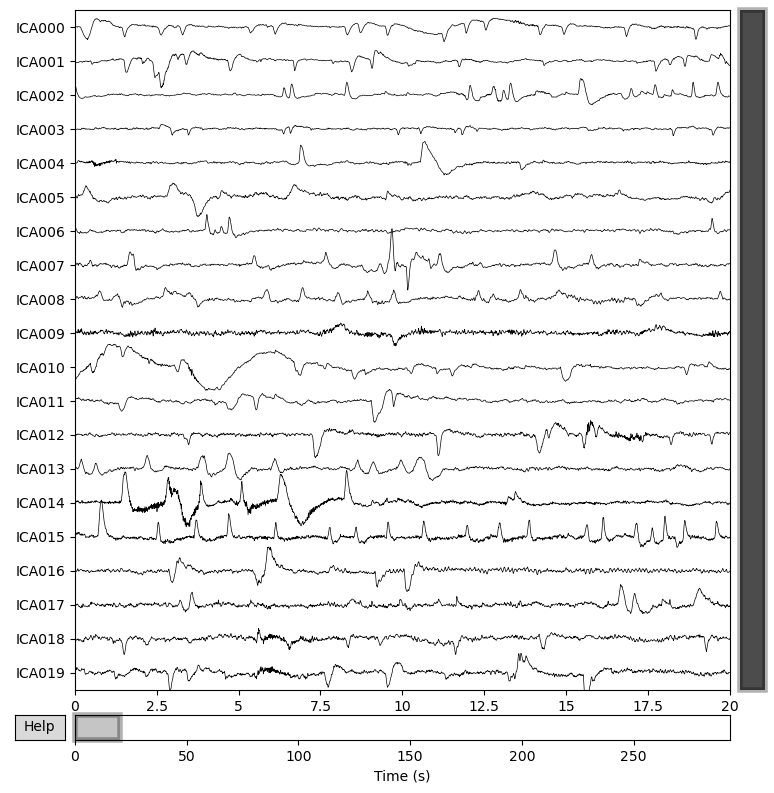

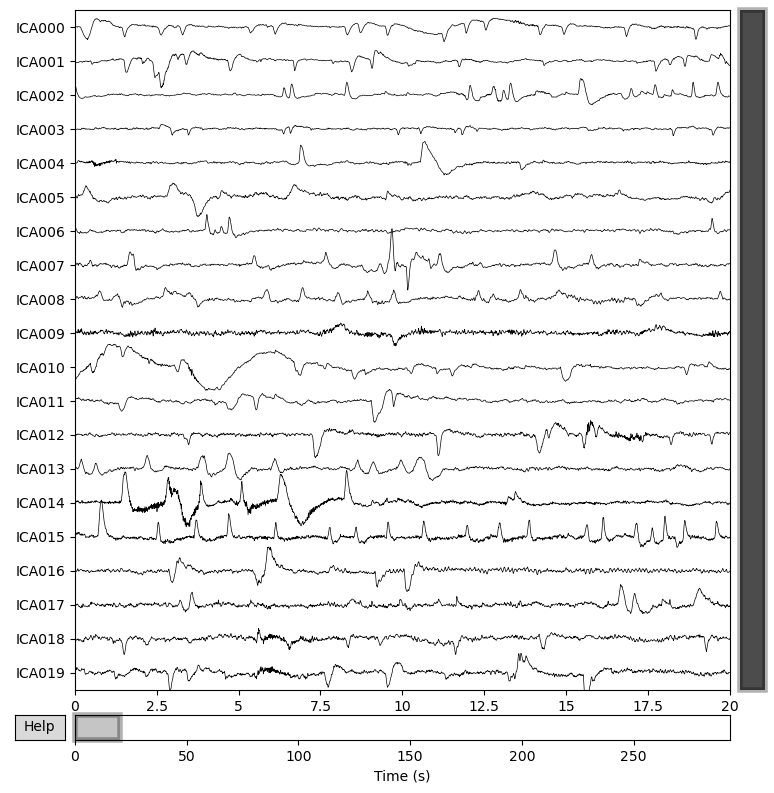

In [43]:
 ica.plot_sources(raw, block=False)

Component 0 has 1 large amplitude peaks, possibly eye blinks
Component 1 has 1 large amplitude peaks, possibly eye blinks
Component 2 has 1 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 12, using nperseg = 12
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 11, using nperseg = 11
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 5, using nperseg = 5
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 18, using nperseg = 18
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is gre

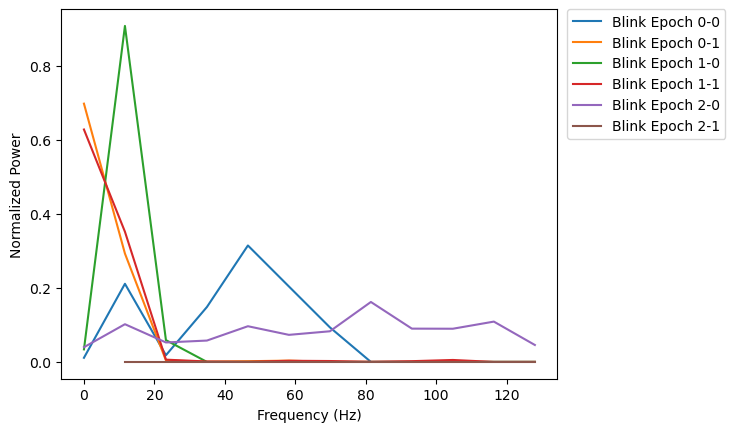

Total number of eye blinks detected:  3


In [44]:
import numpy as np
from scipy.signal import welch

def heaviside(x, threshold=0):
    return np.where(x >= threshold, 1, 0)

blink_indices = []
power_spectra = []
blink_epochs_psd = []

max_freq_bins = 0

for i in range(ica.n_components_):
    component = ica.get_components()[:, i]
    amplitude = max(abs(component))
    threshold = 1.5  # adjust this threshold as needed
    
    blink_signal = heaviside(abs(component) - threshold)
    num_blinks = sum(np.diff(blink_signal) > 0)
    
    if num_blinks > 0:
        blink_indices.append(i)
        print('Component {} has {} large amplitude peaks, possibly eye blinks'.format(i, num_blinks))
        
        # Compute the power spectrum for each blink epoch
        blink_epochs = np.split(component, np.where(np.diff(blink_signal) > 0)[0] + 1)
        for blink_epoch in blink_epochs:
            freq, psd = welch(blink_epoch, fs=ica.info['sfreq'], nperseg=ica.info['sfreq'] * 2)
            psd_normalized = psd / np.sum(psd)
            blink_epochs_psd.append(psd_normalized)
            max_freq_bins = max(max_freq_bins, len(freq))
        
        power_spectra.append(blink_epochs_psd)
        blink_epochs_psd = []

# Pad the power spectra with zeros to have the same number of frequency bins
for i in range(len(power_spectra)):
    for j in range(len(power_spectra[i])):
        power_spectra[i][j] = np.pad(power_spectra[i][j], (0, max_freq_bins - len(power_spectra[i][j])), mode='constant')

# Plot the normalized power spectra for each blink epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for i, psds in enumerate(power_spectra):
    for j, psd_normalized in enumerate(psds):
        freq = np.linspace(0, ica.info['sfreq']/2, len(psd_normalized))
        ax.plot(freq, psd_normalized, label='Blink Epoch {}-{}'.format(i,j))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Normalized Power')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

print("Total number of eye blinks detected: ", len(blink_indices))


In [45]:
type(raw)

mne.io.array.array.RawArray

Effective window size : 0.090 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


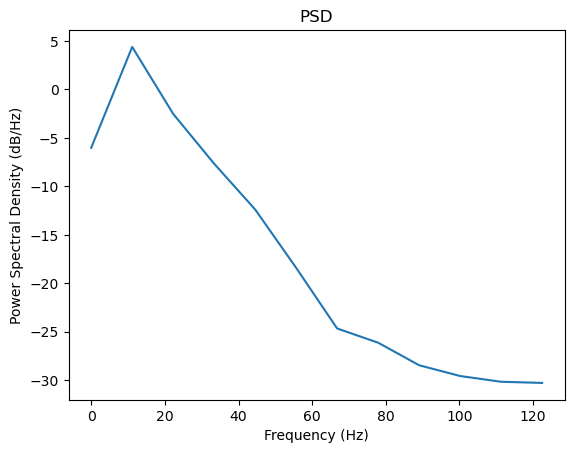

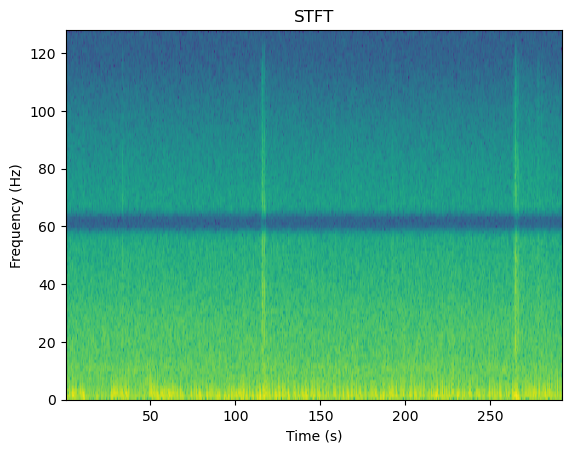

In [46]:
raw_band = raw.copy()

# Calculate power spectral density
n_fft = 23
psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'],n_fft=n_fft)

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Plot STFT
plt.figure()
plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')

plt.show()

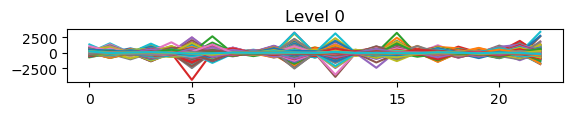

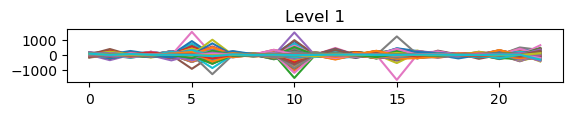

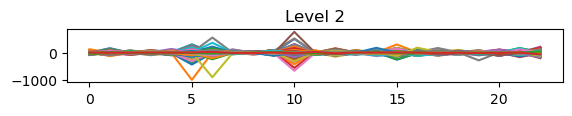

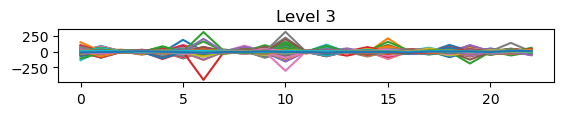

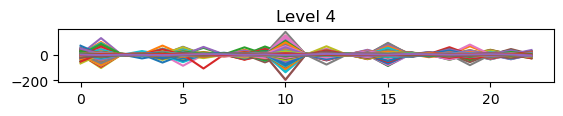

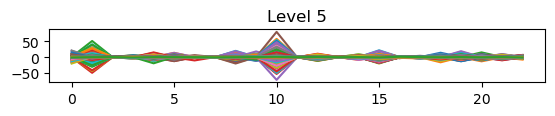

mean_spectrum: [4.05997638e+04 3.28832039e+03 4.43404966e+02 7.29243741e+01
 1.28248523e+01 6.88245058e-01]
var_spectrum: [1.15355444e+09 1.18332346e+07 1.36940033e+05 3.02725586e+03
 2.22300325e+02 1.92446206e+00]


In [47]:
import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data=raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)